## Antes de entrenar un modelo, aprendamos sobre el funcionamiento y la API de scikit-learn

> Datos importantes:

* Por como fue diseñado Scikit-Learn, existe una API muy fácil de ocupar y muy unificada. Esta unificación se da por un objeto que se llama “estimador” que tiene en todos los casos y para el algoritmo de Machine Learning que sea, una API que es común y 3 métodos que son clave.
* Scikit-Learn posee muchos modelos, se pueden implementar tanto, regresiones lineales como regresiones regularizadas, árboles de decisión, SDMs, etc.
* Scikit-Learn contiene todos los modelos que son usados hoy en día, y una de las virtudes de esta librería es que sigue muy de cerca lo que pasa en la investigación.
* Scikit-Learn es la librería más usada de Machine Learning General, no de Machine Learning Especializado, para ello está la librería de Tensor Flow y sirve casi exclusivamente para modelos de Deep Learning.

In [1]:
import numpy as np 
import pandas as pd

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github](https://github.com/showcases/machine-learning). La librería incluye funcionalidades de:
  
  <ul>
    <li> Preprocesamiento de datos en <code> sklearn.preprocessing </code> </li>
    <li> Algoritmos de Machine Learning en <code>sklearn.linear_model</code>, <code>sklearn.svm</code>, <code>sklearn.ensemble</code>, y muchos más.</li>
    <li> Evaluación de modelos en <code>sklearn.model_selection</code> y <code>sklearn.metrics</code> </li>
  </ul>
</div>

<div class="alert alert-success">
  Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Una estructura de datos esencial en scikit-learn es el <strong>Estimator</strong>
</div>
<div class="alert alert-block alert-info" style="margin-top: 20px">
  El estimador es lo que se entrena, aprende y predice
</div>

## Pasos que se siguen para trabajar con el estimador
1. Instanciamos el Estimador que se va a usar
2. Al usar Estimador.fit() entrenamos el modelo, recibe como parametros: matriz de entrenamiento (X_train), vector objetivo (y_train) y argumentos adicionales del estimador (Hiperparametros)
3. En este punto ya tendremos un modelo entrenado con el que se van a realizar predicciones usando el metodo Estimador.predict()


<div class="alert alert-block alert-info" style="margin-top: 20px">
  El <strong>output</strong> de un algoritmo de ML es un modelo entrenado que puede hacer predicciones.
</div>

<img src="img/estimator.png" width="600" style="margin:0 auto;clear:both">

### El Flujo de trabajo más a detalle con los Estimadores
Antes de realizar la parte de .fit() y de .predict(), es decir entrenamiento y predicción, lo que se hace es separar los datos:
* X = nuestro dataFrame completo
* y = las variables target

Estos dos elementos pasan por un train_test_split el cual separa los datos en 
* Datos de entrenamiento 70%(ejemplo)
* Datos de Test 30%(ejemplo)

Los datos son elegidos de forma aleatoria. Luego de que el modelo esta entrenado, usamos los datos de testeo usando el metodo Estimador.score() para medir el desempeño de la predicción.

<img src="img/evaluation_flow.png">

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Para poder escoger el estimator apropiado una excelente guia es el <strong>cheatsheet</strong> siguiente, hecho por uno de los core-dev de scikit-learn.
</div>

<img src="img/ml_map.png" width="1000" style="margin:0 auto;clear:both">

## Implementemos un modelo simple de regresión primero

In [2]:
X = pd.read_csv('intermediate_results/X.csv') #Traigo mi matriz (dataFrame) creada en el notebook 09

In [3]:
y = X['worldwide_gross'] #Defino cual es mi columna objetivo (un vector)

In [4]:
X = X.drop('worldwide_gross',axis=1) #Elimino la variable objetivo del dataFrame para poder trabajar

In [5]:
from sklearn.model_selection import train_test_split 
#Separamos los datos de entrenamiento y los de test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1) 
#Tendremos 60% de datos para entrenamiento y 40% de datos para test

In [6]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [7]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [8]:
from sklearn.linear_model import Lasso #Importamos el estimador que vamos a usar

model = Lasso() #instanciamos el modelo

In [9]:
model.fit(X_train,y_train) #Entrenamos el modelo

/home/jbeltranleon/Documents/estudio/machine-learning-platzi/mlenv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
predicted = model.predict(X_test) #usamos los X_test para realizar las predicciones del 'worldwide_gross'

In [11]:
predicted #Estas son algunas de las predicciones

array([-2.46411161e+07,  1.28074481e+08,  2.94697104e+07, ...,
        8.07710806e+07,  1.60097676e+08,  9.06107917e+07])

In [12]:
predicted.shape

(1642,)

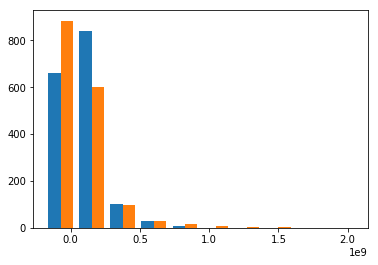

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test]);

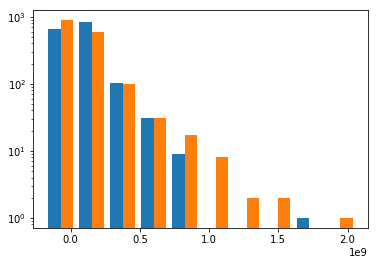

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test],log=True);

### Ajustando Modelos de Machine Mearning, Underfitting y Overfitting


<img src="img/ajuste_de_modelos.png" width="700" style="margin:0 auto;clear:both">

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
<li>Poliniomio = <strong style="color:red;">Constante</strong> -> <strong style="color:red;">Promedio</strong>: No logra predecir muy bien los datos; Nos da un error de entrenamiento alto y un error de test alto, esta situación se llama <strong style="color:red;"> Underfitting</strong></li>
<li><strong style="color:red;">Polinomio de alto grado</strong> = Pasa muy cerca a los datos de entrenamiento, posee muchas variaciones, pero nos va a generar errores con los datos de test, esta es una situación de <strong style="color:red;">Overfitting</strong> dado que es demaciado complejo, no logra tomar el patrón real de los datos</li>
<li><strong style="color:purple;">Polinomio de grado 2</strong> = el cual nos genera una <strong style="color:purple;">parábola</strong> la cual va a generarnos un error bajo en el entrenamiento y tambíen un error bajo en el test</li>
</ul>
</div>

## Evaluemos de forma más fina el comportamiento de nuestro modelo

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función <code>estimator.score</code> ya viene con una de las métricas de <code>sklearn.metrics</code>, que es la métrica <code>sklearn.metric.r2_score</code>
</div>


<div class="alert alert-success">
  El <strong>score R2</strong> de una regresión es una de las formas más comunes de entender su poder predictivo. Este <strong>mientras más cerca de 1 este, mejor es</strong>
</div>
<div class="alert alert-success">
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media. 
</div>

In [15]:
model.score(X_test,y_test) #Este es nuestro primer score la idea es llevarlo a >0.7

0.6023284033956979

Bastante bien para un primer modelo!

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

<img src="img/datasaurus_dozen.png" width="800" style="margin:0 auto;clear:both">
<div class="alert alert-success">
<strong>Siempre visualiza tus resultados</strong>, aunque tengas un buen score de performance.
</div>



In [16]:
residuals = y_test - predicted

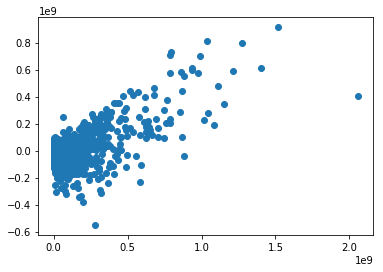

In [17]:
plt.scatter(y_test,residuals)

In [18]:
ap_residuals = np.abs(residuals) / y_test

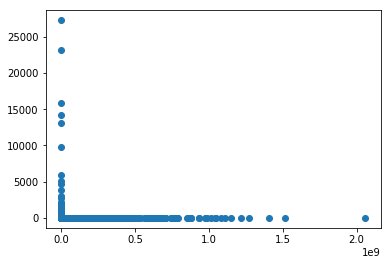

In [19]:
plt.scatter(y_test,ap_residuals)

In [20]:
lap_residuals = np.log(ap_residuals)

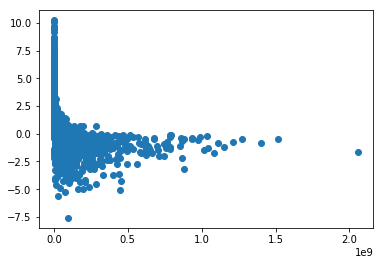

In [21]:
plt.scatter(y_test,lap_residuals)

/home/jbeltranleon/Documents/estudio/machine-learning-platzi/mlenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


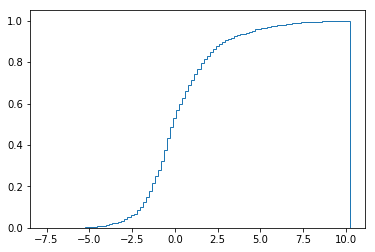

In [22]:
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);

/home/jbeltranleon/Documents/estudio/machine-learning-platzi/mlenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

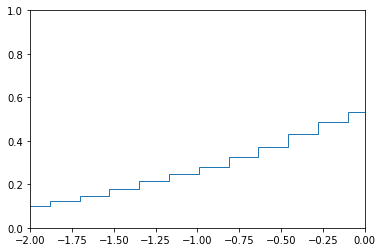

In [23]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

ValueError: x and y must be the same size

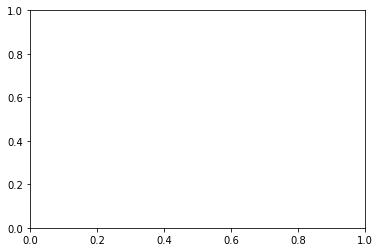

In [25]:
plt.scatter(np.arange(8),model.coef_)

In [79]:
X = pd.read_csv('../vol/intermediate_results/X.csv')

In [78]:
X = X.drop('gross',axis=1)

In [80]:
X = X.drop('worldwide_gross',axis=1)

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [82]:
model = Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
model.score(X_test,y_test)

0.87745681705925049

In [87]:
X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration.1',
       'cast_total_facebook_likes', 'budget', 'imdb_score', 'gross'],
      dtype='object')

In [92]:
for el in zip(list(X.columns),list(model.coef_)):
    print(el)

('production_budget', 0.76287929242158148)
('title_year', 0.82847598230185637)
('aspect_ratio', 0.3963785144996036)
('duration.1', 1.5849161930072848)
('cast_total_facebook_likes', -218.60395867759215)
('budget', 0.0031745843702155035)
('imdb_score', 4426444.4687358243)
('gross', 2.1308279122355804)
